In [8]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from graph import *

# Page Rank

<img src="800px-PageRanks-Example.jpg" width=500></img>

Image from [https://en.wikipedia.org/wiki/PageRank](https://en.wikipedia.org/wiki/PageRank)

Suppose we have 6 different websites that we want to rank. They appear in the dictionary `name_mapping`, that indicates the website string name for each node in the graph (or position in the transition matrix).

In [10]:
name_mapping={0:'Google', 1:'Facebook', 2:'Amazon', 3:'Wikipedia', 4:'Twitter', 5:'YouTube'}

The list `edges` contains the outgoing link information. Each list entry `[x,y]` indicates that a node x (or website x) has a link to node y (or website y). The code snippet below constructs the adjacency matrix, and plots the corresponding graph.

[[0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0.]]


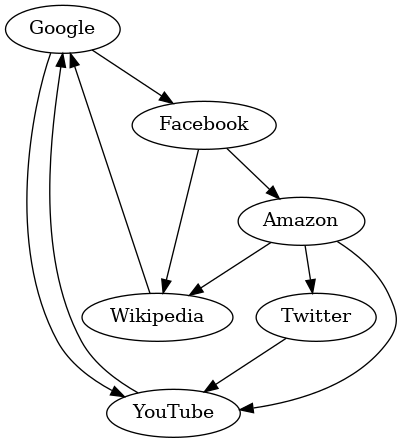

In [11]:
edges = [
    [0,1], [0,5],
    [1,2], [1,3],
    [2,3], [2,4], [2,5],
    [3,0],
    [4,5],
    [5,0]]

A = np.zeros((6,6))
for edge in edges:
    A[edge[1], edge[0]] = 1
    
print(A)

graph_matrix(A, list(name_mapping.values()), show_weights=False)

### Definition of the **PageRank model**:

 “PageRank can be thought of as a model of user behavior. We assume there is a random surfer who is given a web page at random and keeps clicking on links, never hitting “back”…”
 
 http://infolab.stanford.edu/~backrub/google.html

Let's put numbers to the statement above and see how it applies to the example above. Suppose a random surfer is initially at website 0. His initial state would be:

[1,0,0,0,0,0]

The web surfer will click on links on the current website, and he will keep doing this until he achieves a steady-state (he will never hit "back button"). 

For the example above, if he is on the Google website (according the `name_mapping`, the website with index 0), he will either be going to Facebook or YouTube next. Since there are two links, we will assume that each website has the same probability of being the next one, so there is a probability of 50% he will go to Facebook and 50% he will go to YouTube.

How can you modify the adjacency matrix $A$, such that it satisfies the properties above?

Here is what your adjacency matrix looks like:

In [12]:
A

array([[0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.]])

Recall that the column of the matrix `A` has all the outgoing links, i.e., if we look at the column `0` we will find all the outgoing links from the Google website.  

**Check your answer:**

Contruct the Markov matrix `M`. Do not hard code. Use the properties of the Markov matrix (specifically the one that the column sum is equal to 1; here representing the probabilities of the outgoing links) in order to construct the matrix `M` from the existing matrix `A`.

In [13]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
column_sums = np.sum(A, axis = 0)
M = A / column_sums

print(M)

[[0.         0.         0.         1.         0.         1.        ]
 [0.5        0.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.         0.        ]
 [0.         0.5        0.33333333 0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.         0.        ]
 [0.5        0.         0.33333333 0.         1.         0.        ]]


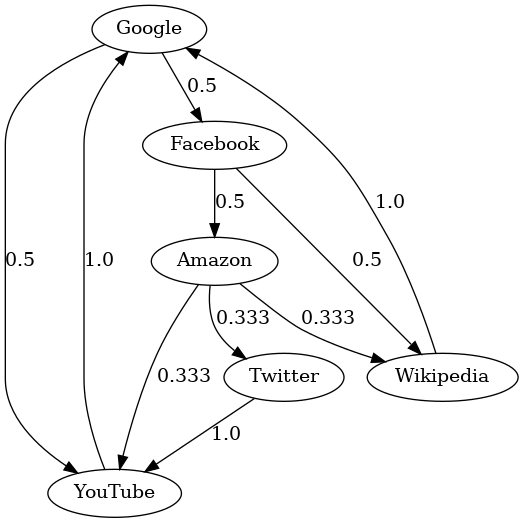

In [14]:
graph_matrix(M, list(name_mapping.values()))

**Check your answer:**

Complete the code snippet below to get the steady-state for this problem:

- Start from the given initial vector
- Make sure the probability of the initial state sums to 1. 
- Assume 20 iterations of power method

Store each update for the state vector x as a column of the 2d array `allx`

In [15]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
np.random.seed(10)
n = A.shape[0]
x0 = np.random.rand(n)
x0N=x0/la.norm(x0,1)
print('Initial vector:')
print(x0N)

its = 20
allx = np.zeros((n,its))
allx[:,0] = x0N

# add your code here
for i in range(1, its):
    allx[:,i] = M @ allx[:,i-1]
    
print(allx[:,its-1])

Initial vector:
[0.26617196 0.00716121 0.21866313 0.25840174 0.17202779 0.07757418]
[0.35293868 0.17647246 0.08823473 0.11764575 0.02941102 0.23529736]


Take a look how the vector `x` converged to a steady-state solution. For this example, we observe that Google has the highest probability that a random web-surfer will land on that page, and Twitter has the lowest probability.

In [16]:
name_mapping

{0: 'Google',
 1: 'Facebook',
 2: 'Amazon',
 3: 'Wikipedia',
 4: 'Twitter',
 5: 'YouTube'}

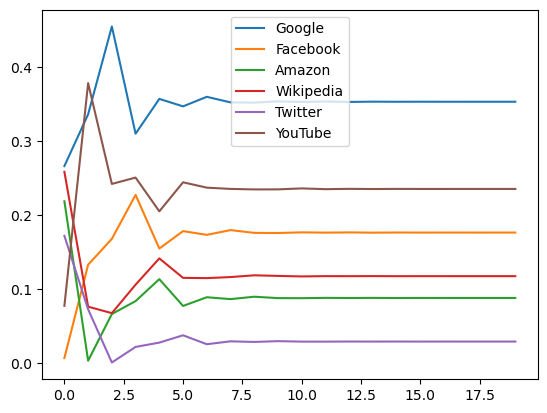

In [17]:
plt.plot(allx.T)
plt.legend(list(name_mapping.values()))

**Check your answer:**

At steady-state, what is the most likely page the user will end up at, when starting from a random page? How can we get this programatically?

Define the list of strings `ranking` with the rank of the websites (the string names), starting from the mostly likely the user will end up at, to the least likely. 

**Hint:** np.argsort()


In [18]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
final_x = allx[:,its-1]
ranking = [name_mapping[i] for i in np.flip(np.argsort(final_x))]
print(ranking)

['Google', 'YouTube', 'Facebook', 'Wikipedia', 'Amazon', 'Twitter']


### What happens when the web surfer ends up in a website without any outgoing link? 

Let's repeat the example above, with a simple change to the outgoing links. Page 5 (YouTube) no longer has an outgoing link.

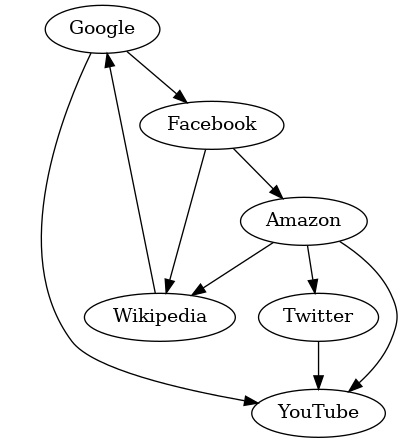

array([[0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.]])

In [19]:
edges_2 = [
    [0,1], [0,5],
    [1,2], [1,3],
    [2,3], [2,4], [2,5],
    [3,0],
    [4,5]]

B = np.zeros((6,6))
for i, j in edges_2:
    B[j, i] = 1

graph_matrix(B, list(name_mapping.values()), show_weights=False)
B

**Check your answer!**

**Once the web surfer reaches a page without outgoing links, we can assume that he will not stay on that webpage forever!** So what do your think they will do instead?

Note that you can no longer use the method above to obtain the Markov matrix, since the sum of the fifth column is now zero.

Discuss with your group, and propose ideas to solve this issue.

After you propose some possible solutions, you can set `discussed = True` in the `#grade` cell below. You will be able to see the Google PageRank solution in the submission panel.

In [20]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
discussed = True

**Check your answer!**

Construct the Markov matrix `Mb` considering the scenario when some pages may not have any outgoing link. 

Do not hard code your solution for this example. Write a code snippet that can construct the matrix `Mb` from any given adjacency matrix `B`.

In [21]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
m = len(B)
Mb = B
for col in range(m):
    if np.sum(Mb[:,col]) == 0:
        Mb[:,col] = 1/m
Mb = Mb / np.sum(Mb, axis=0)
Mb

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.16666667],
       [0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.16666667],
       [0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.16666667],
       [0.        , 0.5       , 0.33333333, 0.        , 0.        ,
        0.16666667],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ,
        0.16666667],
       [0.5       , 0.        , 0.33333333, 0.        , 1.        ,
        0.16666667]])

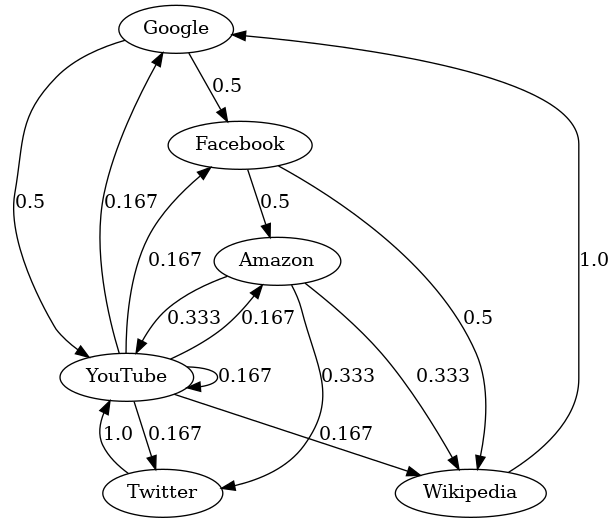

In [22]:
graph_matrix(Mb, list(name_mapping.values()))

**Check your answer:**

Complete the function below that finds the steady-state vector given an adjacency matrix `B`. Your function should

- construct the Markov matrix given the adjacency matrix A
- perform power iteration method, and stop when $||{\bf x}_{k+1} - {\bf x}_{k}||_2 < tol = 10^{-6}$
- store each update for the state vector x as a column of the 2d array `allx`
- generate the list `ranking` with the ranking of the websites in `name_mapping`

**Hint:** Initialize `allx` to be starting vector `x0` and use np.vstack() to concatenate each update vector `x`. Remember to take transpose at last to make columns of `allx` to be state vectors `x`.


In [23]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def solve_page_rank(B,name_mapping,x0,tol=1e-6):
    n = len(B)
    M = B
    for col in range(n):
        if np.sum(M[:,col]) == 0:
            M[:,col] = 1/n
    M = M / np.sum(M, axis=0)
    print(M)
    
    allx = [x0]
    x = x0
    print(x0)
    while la.norm(x - M @ x, 2) >= tol:
        x = M @ x
        allx.append(x)
        
    x = M @ x
    allx.append(x)

    ranking = [name_mapping[i] for i in np.flip(np.argsort(allx[-1]))]
    allx = np.array(allx).T
    
    # B: adjacency matrix
    # name_mapping: dictionary with website names (see above example)
    # x0: initial vector
    # tol: stopping criteria for the power iteration method
    

    return allx, ranking


[[0.         0.         0.         1.         0.         0.16666667]
 [0.5        0.         0.         0.         0.         0.16666667]
 [0.         0.5        0.         0.         0.         0.16666667]
 [0.         0.5        0.33333333 0.         0.         0.16666667]
 [0.         0.         0.33333333 0.         0.         0.16666667]
 [0.5        0.         0.33333333 0.         1.         0.16666667]]
[0.06937896 0.26640444 0.05923742 0.03094434 0.24007302 0.33396182]
(6, 32)
['YouTube', 'Google', 'Wikipedia', 'Facebook', 'Amazon', 'Twitter']


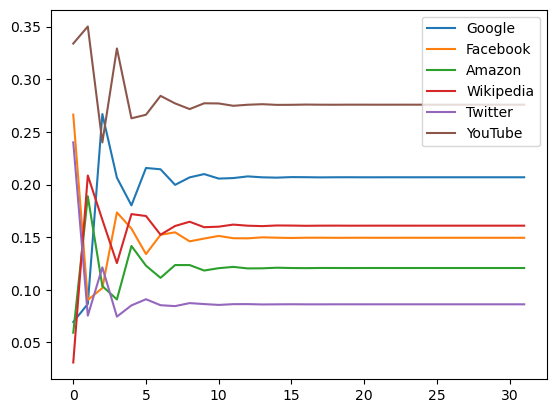

In [24]:
# initial vector
x0 = np.random.rand(n)
x0=x0/la.norm(x0,1)
# call your function
allx2, ranking2 = solve_page_rank(B,name_mapping,x0)
# print your results
print(allx2.shape)
# print(allx2[:,-1])
plt.plot(allx2.T)
plt.legend(list(name_mapping.values()))
print(ranking2)

You can run the cell above, and observe that the initial condition changes, but the steady-state vector is always the same!

### One remaining issue!

The Markov matrix does not guarantee a unique solution! Let's take a look at this example:

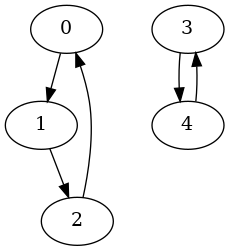

In [25]:
C = np.array([[0,0,1,0,0],[1,0,0,0,0],[0,1,0,0,0],[0,0,0,0,1],[0,0,0,1,0]])
graph_matrix(C,  show_weights=False)

The matrix `C` has two eigenvectors corresponding to the same eigenvalue of 1.

In [26]:
l,v = la.eig(C)
print('The eigenvalues are:')
print(l)

The eigenvalues are:
[-0.5+0.8660254j -0.5-0.8660254j  1. +0.j         1. +0.j
 -1. +0.j       ]


Some of the eigenvalues are complex, but we are interested in the two eigenvectors corresponding to the eigenvalue 1.

In [27]:
v[:,2]/la.norm(v[:,2],1)

array([-0.33333333+0.j, -0.33333333+0.j, -0.33333333+0.j,  0.        +0.j,
        0.        +0.j])

In [28]:
v[:,3]/la.norm(v[:,3],1)

array([0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j])

Hence both
$$
{\bf x^*} = \begin{bmatrix}
    0 \\
    0 \\
    0 \\
    0.5 \\
    0.5
\end{bmatrix}
\qquad \textrm{and} \qquad 
{\bf x^*} = \begin{bmatrix}
    0.33 \\
    0.33 \\
    0.33 \\
    0 \\
    0
\end{bmatrix}
$$
are possible solutions!

#### Perron-Frobenius theorem (CIRCA 1910):
If ${\bf M}$ is a Markov matrix with ***all positive entries***, then ${\bf M}$  has unique steady-state vector ${\bf x}^*$.

### Definition of the **PageRank model** (complete):

“PageRank can be thought of as a model of user behavior. We assume there is a random surfer who is given a web page at random and keeps clicking on links, never hitting 'back', but **eventually gets bored and starts on another random page**."
 
To model the behavior of a web surfer getting bored, the proposed **Google matrix** is defined as:
 
 
 $$ G = \alpha \, {\bf M} + (1-\alpha) \,\frac{1}{n} \mathbf{1} $$
 
 
where $\mathbf{1}$ is a matrix of ones with same dimension $n$ as the Markov matrix ${\bf M}$. We divide $\mathbf{1}$ by $n$ to enforce that the columns sum to 1. In this model, a  web surfer clicks on a link on the current page with probability $\alpha$ and opens a random page with probability $(1-\alpha)$, where $0< \alpha < 1$. A typical value for $\alpha$ is $0.85$. 
Note that the Google matrix ${\bf G}$ has all entries greater than zero, and guarantees a unique solution.



Construct the Google matrix ${\bf G}$ for the Markov matrix `Mb` from the example above, using $\alpha = 0.85$:

In [29]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
a = 0.85
G = a * Mb + (1 - a) / n * np.ones((len(Mb), len(Mb)))

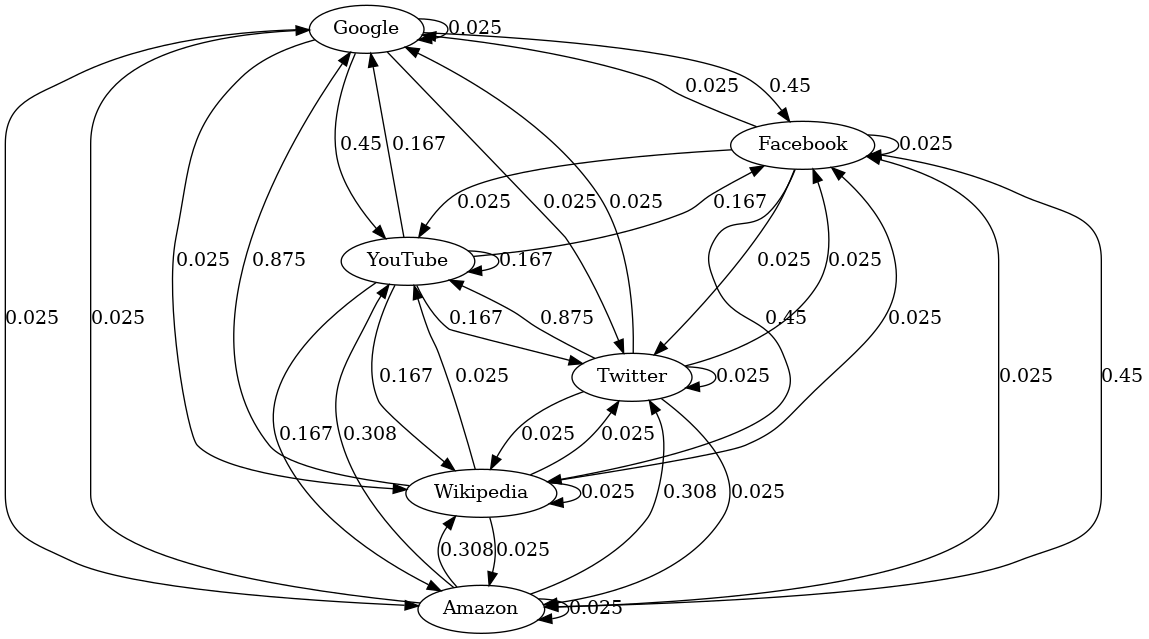

In [30]:
graph_matrix(G, list(name_mapping.values()))

**Check your answer:**

Complete the function below that solves the PageRank problem using the Google Matrix. You should start from your defined function `solve_page_rank`, and then add the modified Google Matrix.

In [31]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def solve_page_rank_Google_matrix(B,name_mapping,x0,alpha,tol=1e-6):
    n = len(B)
    M = B
    for col in range(n):
        if np.sum(M[:,col]) == 0:
            M[:,col] = 1/n
    M = M / np.sum(M, axis=0)
    G = alpha * M + (1 - alpha) / n * np.ones((n, n))
    
    allx = [x0]
    x = x0
    while la.norm(x - G @ x, 2) >= tol:
        x = G @ x
        allx.append(x)
        
    x = G @ x
    allx.append(x)

    ranking = [name_mapping[i] for i in np.flip(np.argsort(allx[-1]))]
    allx = np.array(allx).T
    
    # B: adjacency matrix
    # name_mapping: dictionary with website names (see above example)
    # x0: initial vector
    # tol: stopping criteria for the power iteration method
    

    return allx, ranking



[0.19987979 0.14777985 0.1256373  0.16123443 0.09842794 0.26704069]
['YouTube', 'Google', 'Wikipedia', 'Facebook', 'Amazon', 'Twitter']


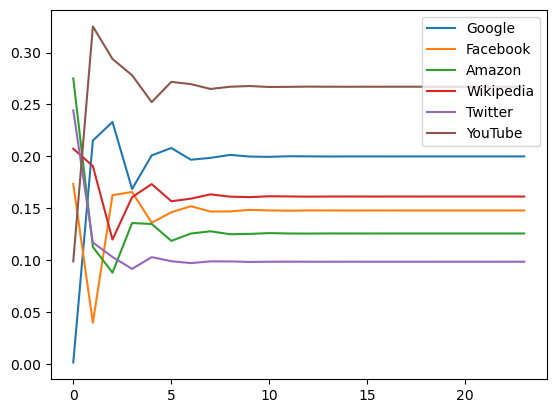

In [32]:
# initial vector
x0 = np.random.rand(n)
x0=x0/la.norm(x0,1)
# call your function
allx3, ranking3 = solve_page_rank_Google_matrix(B,name_mapping,x0,0.85)
# print your results
print(allx3[:,-1])
plt.plot(allx3.T)
plt.legend(list(name_mapping.values()))
print(ranking3)

### Overall complexity of PageRank problem

In general, for the dense Google matrix with shape $(n,n)$, the cost of each matrix-vector multiplication during the power iteration method would be $O(n^2)$. 

$$ {\bf x}_{i+1} = {\bf G \, x}_{i} $$


In a PageRank problem, $n$ is very large! But let's look at each part of the Google matrix:

 $$ {\bf G} = \alpha \, {\bf M} + (1-\alpha) \,\frac{1}{n} \mathbf{1} $$
 
The Markov Matrix for the PageRank problem will likely be very sparse, since webpages will only have a few number of outgoing links. Hence, the calculation 

$$ {\bf x}_{i+1} = {\bf M \, x}_{i} $$

will take advantage of sparse operations, which can be in general approximated with $O(n)$ complexity.

We need to look at the complexity of performing

$$ {\bf x}_{i+1} = \mathbf{1} \, {\bf x}_{i} $$

Since $\mathbf{1}$ is a dense matrix, some would quickly jump to the conclusion that the complexity is $O(n^2)$. But it is not! Can you think of how this operation can be done efficiently? Discuss this with your team!






In [33]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from graph import *

# Page Rank

<img src="800px-PageRanks-Example.jpg" width=500></img>

Image from [https://en.wikipedia.org/wiki/PageRank](https://en.wikipedia.org/wiki/PageRank)

Suppose we have 6 different websites that we want to rank. They appear in the dictionary `name_mapping`, that indicates the website string name for each node in the graph (or position in the transition matrix).

In [ ]:
name_mapping={0:'Google', 1:'Facebook', 2:'Amazon', 3:'Wikipedia', 4:'Twitter', 5:'YouTube'}

The list `edges` contains the outgoing link information. Each list entry `[x,y]` indicates that a node x (or website x) has a link to node y (or website y). The code snippet below constructs the adjacency matrix, and plots the corresponding graph.

[[0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0.]]


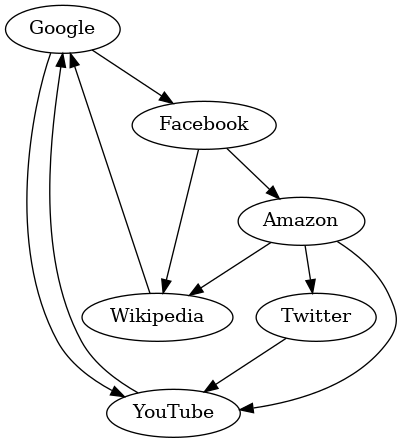

In [ ]:
edges = [
    [0,1], [0,5],
    [1,2], [1,3],
    [2,3], [2,4], [2,5],
    [3,0],
    [4,5],
    [5,0]]

A = np.zeros((6,6))
for edge in edges:
    A[edge[1], edge[0]] = 1
    
print(A)

graph_matrix(A, list(name_mapping.values()), show_weights=False)

### Definition of the **PageRank model**:

 “PageRank can be thought of as a model of user behavior. We assume there is a random surfer who is given a web page at random and keeps clicking on links, never hitting “back”…”
 
 http://infolab.stanford.edu/~backrub/google.html

Let's put numbers to the statement above and see how it applies to the example above. Suppose a random surfer is initially at website 0. His initial state would be:

[1,0,0,0,0,0]

The web surfer will click on links on the current website, and he will keep doing this until he achieves a steady-state (he will never hit "back button"). 

For the example above, if he is on the Google website (according the `name_mapping`, the website with index 0), he will either be going to Facebook or YouTube next. Since there are two links, we will assume that each website has the same probability of being the next one, so there is a probability of 50% he will go to Facebook and 50% he will go to YouTube.

How can you modify the adjacency matrix $A$, such that it satisfies the properties above?

Here is what your adjacency matrix looks like:

In [ ]:
A

array([[0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.]])

Recall that the column of the matrix `A` has all the outgoing links, i.e., if we look at the column `0` we will find all the outgoing links from the Google website.  

**Check your answer:**

Contruct the Markov matrix `M`. Do not hard code. Use the properties of the Markov matrix (specifically the one that the column sum is equal to 1; here representing the probabilities of the outgoing links) in order to construct the matrix `M` from the existing matrix `A`.

In [ ]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
column_sums = np.sum(A, axis = 0)
M = A / column_sums

print(M)

[[0.         0.         0.         1.         0.         1.        ]
 [0.5        0.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.         0.        ]
 [0.         0.5        0.33333333 0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.         0.        ]
 [0.5        0.         0.33333333 0.         1.         0.        ]]


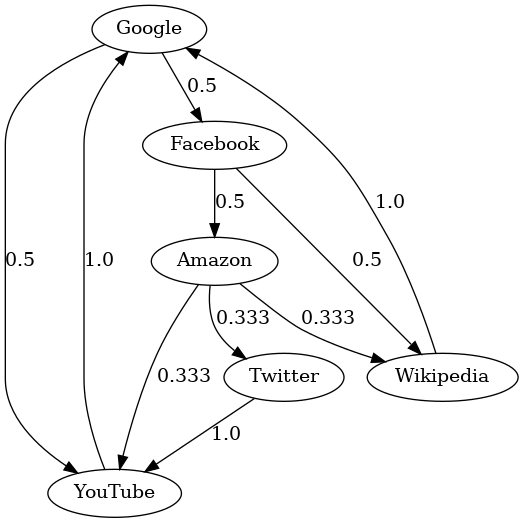

In [ ]:
graph_matrix(M, list(name_mapping.values()))

**Check your answer:**

Complete the code snippet below to get the steady-state for this problem:

- Start from the given initial vector
- Make sure the probability of the initial state sums to 1. 
- Assume 20 iterations of power method

Store each update for the state vector x as a column of the 2d array `allx`

In [ ]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
np.random.seed(10)
n = A.shape[0]
x0 = np.random.rand(n)
x0N=x0/la.norm(x0,1)
print('Initial vector:')
print(x0N)

its = 20
allx = np.zeros((n,its))
allx[:,0] = x0N

# add your code here
for i in range(1, its):
    allx[:,i] = M @ allx[:,i-1]
    
print(allx[:,its-1])

Initial vector:
[0.26617196 0.00716121 0.21866313 0.25840174 0.17202779 0.07757418]
[0.35293868 0.17647246 0.08823473 0.11764575 0.02941102 0.23529736]


Take a look how the vector `x` converged to a steady-state solution. For this example, we observe that Google has the highest probability that a random web-surfer will land on that page, and Twitter has the lowest probability.

In [ ]:
name_mapping

{0: 'Google',
 1: 'Facebook',
 2: 'Amazon',
 3: 'Wikipedia',
 4: 'Twitter',
 5: 'YouTube'}

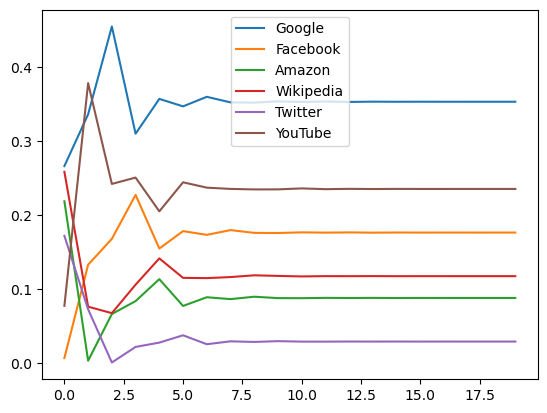

In [ ]:
plt.plot(allx.T)
plt.legend(list(name_mapping.values()))

**Check your answer:**

At steady-state, what is the most likely page the user will end up at, when starting from a random page? How can we get this programatically?

Define the list of strings `ranking` with the rank of the websites (the string names), starting from the mostly likely the user will end up at, to the least likely. 

**Hint:** np.argsort()


In [ ]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
final_x = allx[:,its-1]
ranking = [name_mapping[i] for i in np.flip(np.argsort(final_x))]
print(ranking)

['Google', 'YouTube', 'Facebook', 'Wikipedia', 'Amazon', 'Twitter']


### What happens when the web surfer ends up in a website without any outgoing link? 

Let's repeat the example above, with a simple change to the outgoing links. Page 5 (YouTube) no longer has an outgoing link.

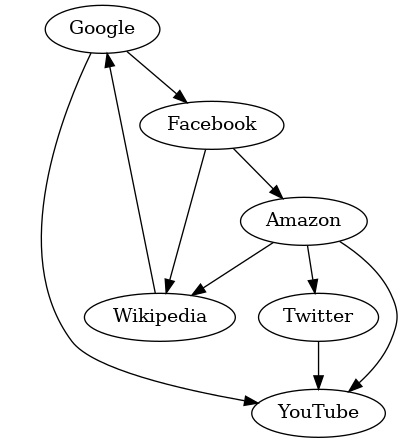

array([[0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0.]])

In [ ]:
edges_2 = [
    [0,1], [0,5],
    [1,2], [1,3],
    [2,3], [2,4], [2,5],
    [3,0],
    [4,5]]

B = np.zeros((6,6))
for i, j in edges_2:
    B[j, i] = 1

graph_matrix(B, list(name_mapping.values()), show_weights=False)
B

**Check your answer!**

**Once the web surfer reaches a page without outgoing links, we can assume that he will not stay on that webpage forever!** So what do your think they will do instead?

Note that you can no longer use the method above to obtain the Markov matrix, since the sum of the fifth column is now zero.

Discuss with your group, and propose ideas to solve this issue.

After you propose some possible solutions, you can set `discussed = True` in the `#grade` cell below. You will be able to see the Google PageRank solution in the submission panel.

In [ ]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
discussed = True

**Check your answer!**

Construct the Markov matrix `Mb` considering the scenario when some pages may not have any outgoing link. 

Do not hard code your solution for this example. Write a code snippet that can construct the matrix `Mb` from any given adjacency matrix `B`.

In [ ]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
m = len(B)
Mb = B
for col in range(m):
    if np.sum(Mb[:,col]) == 0:
        Mb[:,col] = 1/m
Mb = Mb / np.sum(Mb, axis=0)
Mb

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.16666667],
       [0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.16666667],
       [0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.16666667],
       [0.        , 0.5       , 0.33333333, 0.        , 0.        ,
        0.16666667],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ,
        0.16666667],
       [0.5       , 0.        , 0.33333333, 0.        , 1.        ,
        0.16666667]])

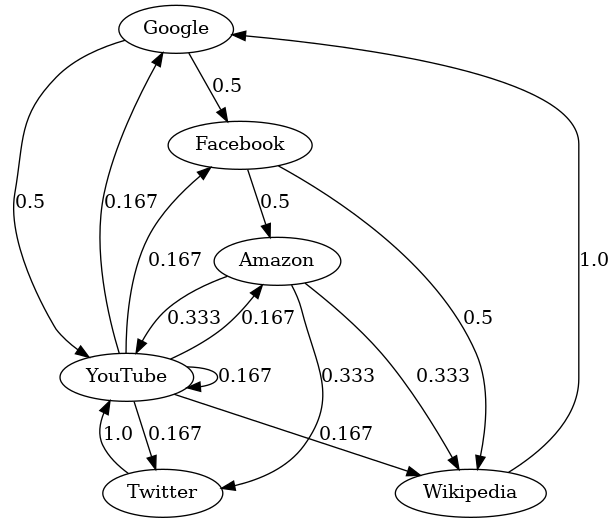

In [ ]:
graph_matrix(Mb, list(name_mapping.values()))

**Check your answer:**

Complete the function below that finds the steady-state vector given an adjacency matrix `B`. Your function should

- construct the Markov matrix given the adjacency matrix A
- perform power iteration method, and stop when $||{\bf x}_{k+1} - {\bf x}_{k}||_2 < tol = 10^{-6}$
- store each update for the state vector x as a column of the 2d array `allx`
- generate the list `ranking` with the ranking of the websites in `name_mapping`

**Hint:** Initialize `allx` to be starting vector `x0` and use np.vstack() to concatenate each update vector `x`. Remember to take transpose at last to make columns of `allx` to be state vectors `x`.


In [ ]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def solve_page_rank(B,name_mapping,x0,tol=1e-6):
    n = len(B)
    M = B
    for col in range(n):
        if np.sum(M[:,col]) == 0:
            M[:,col] = 1/n
    M = M / np.sum(M, axis=0)
    print(M)
    
    allx = [x0]
    x = x0
    print(x0)
    while la.norm(x - M @ x, 2) >= tol:
        x = M @ x
        allx.append(x)
        
    x = M @ x
    allx.append(x)

    ranking = [name_mapping[i] for i in np.flip(np.argsort(allx[-1]))]
    allx = np.array(allx).T
    
    # B: adjacency matrix
    # name_mapping: dictionary with website names (see above example)
    # x0: initial vector
    # tol: stopping criteria for the power iteration method
    

    return allx, ranking


[[0.         0.         0.         1.         0.         0.16666667]
 [0.5        0.         0.         0.         0.         0.16666667]
 [0.         0.5        0.         0.         0.         0.16666667]
 [0.         0.5        0.33333333 0.         0.         0.16666667]
 [0.         0.         0.33333333 0.         0.         0.16666667]
 [0.5        0.         0.33333333 0.         1.         0.16666667]]
[0.15577805 0.05889522 0.17965241 0.29023268 0.03193013 0.28351152]
(6, 31)
['YouTube', 'Google', 'Wikipedia', 'Facebook', 'Amazon', 'Twitter']


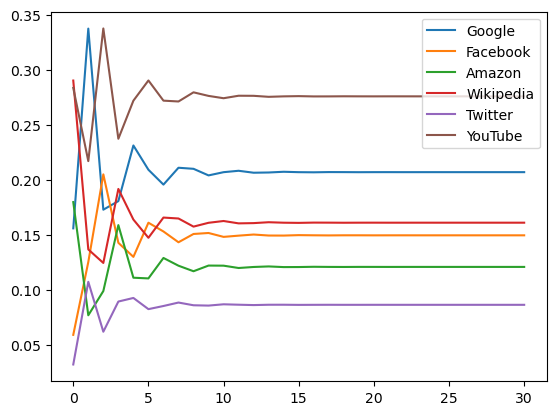

In [ ]:
# initial vector
x0 = np.random.rand(n)
x0=x0/la.norm(x0,1)
# call your function
allx2, ranking2 = solve_page_rank(B,name_mapping,x0)
# print your results
print(allx2.shape)
# print(allx2[:,-1])
plt.plot(allx2.T)
plt.legend(list(name_mapping.values()))
print(ranking2)

You can run the cell above, and observe that the initial condition changes, but the steady-state vector is always the same!

### One remaining issue!

The Markov matrix does not guarantee a unique solution! Let's take a look at this example:

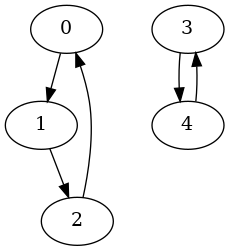

In [ ]:
C = np.array([[0,0,1,0,0],[1,0,0,0,0],[0,1,0,0,0],[0,0,0,0,1],[0,0,0,1,0]])
graph_matrix(C,  show_weights=False)

The matrix `C` has two eigenvectors corresponding to the same eigenvalue of 1.

In [ ]:
l,v = la.eig(C)
print('The eigenvalues are:')
print(l)

The eigenvalues are:
[-0.5+0.8660254j -0.5-0.8660254j  1. +0.j         1. +0.j
 -1. +0.j       ]


Some of the eigenvalues are complex, but we are interested in the two eigenvectors corresponding to the eigenvalue 1.

In [ ]:
v[:,2]/la.norm(v[:,2],1)

array([-0.33333333+0.j, -0.33333333+0.j, -0.33333333+0.j,  0.        +0.j,
        0.        +0.j])

In [ ]:
v[:,3]/la.norm(v[:,3],1)

array([0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j])

Hence both
$$
{\bf x^*} = \begin{bmatrix}
    0 \\
    0 \\
    0 \\
    0.5 \\
    0.5
\end{bmatrix}
\qquad \textrm{and} \qquad 
{\bf x^*} = \begin{bmatrix}
    0.33 \\
    0.33 \\
    0.33 \\
    0 \\
    0
\end{bmatrix}
$$
are possible solutions!

#### Perron-Frobenius theorem (CIRCA 1910):
If ${\bf M}$ is a Markov matrix with ***all positive entries***, then ${\bf M}$  has unique steady-state vector ${\bf x}^*$.

### Definition of the **PageRank model** (complete):

“PageRank can be thought of as a model of user behavior. We assume there is a random surfer who is given a web page at random and keeps clicking on links, never hitting 'back', but **eventually gets bored and starts on another random page**."
 
To model the behavior of a web surfer getting bored, the proposed **Google matrix** is defined as:
 
 
 $$ G = \alpha \, {\bf M} + (1-\alpha) \,\frac{1}{n} \mathbf{1} $$
 
 
where $\mathbf{1}$ is a matrix of ones with same dimension $n$ as the Markov matrix ${\bf M}$. We divide $\mathbf{1}$ by $n$ to enforce that the columns sum to 1. In this model, a  web surfer clicks on a link on the current page with probability $\alpha$ and opens a random page with probability $(1-\alpha)$, where $0< \alpha < 1$. A typical value for $\alpha$ is $0.85$. 
Note that the Google matrix ${\bf G}$ has all entries greater than zero, and guarantees a unique solution.



Construct the Google matrix ${\bf G}$ for the Markov matrix `Mb` from the example above, using $\alpha = 0.85$:

In [ ]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
a = 0.85
G = a * Mb + (1 - a) / n * np.ones((len(Mb), len(Mb)))

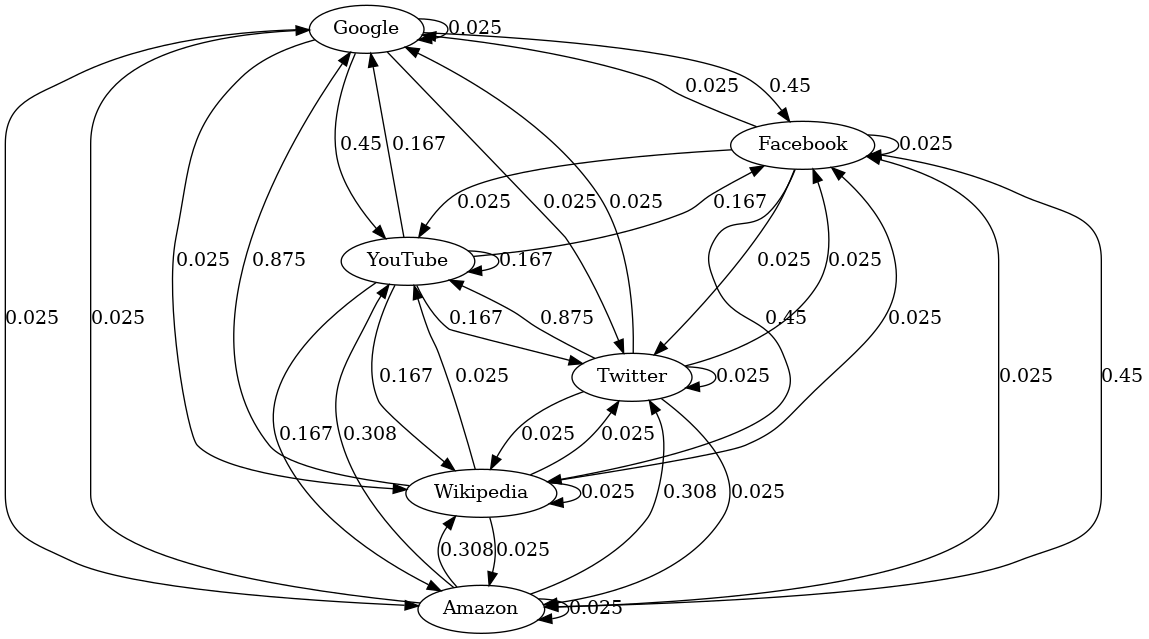

In [ ]:
graph_matrix(G, list(name_mapping.values()))

**Check your answer:**

Complete the function below that solves the PageRank problem using the Google Matrix. You should start from your defined function `solve_page_rank`, and then add the modified Google Matrix.

In [ ]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
def solve_page_rank_Google_matrix(B,name_mapping,x0,alpha,tol=1e-6):
    n = len(B)
    M = B
    for col in range(n):
        if np.sum(M[:,col]) == 0:
            M[:,col] = 1/n
    M = M / np.sum(M, axis=0)
    G = alpha * M + (1 - alpha) / n * np.ones((n, n))
    
    allx = [x0]
    x = x0
    while la.norm(x - G @ x, 2) >= tol:
        x = G @ x
        allx.append(x)
        
    x = G @ x
    allx.append(x)

    ranking = [name_mapping[i] for i in np.flip(np.argsort(allx[-1]))]
    allx = np.array(allx).T
    
    # B: adjacency matrix
    # name_mapping: dictionary with website names (see above example)
    # x0: initial vector
    # tol: stopping criteria for the power iteration method
    

    return allx, ranking



[0.19987976 0.14777986 0.12563732 0.16123444 0.09842794 0.26704069]
['YouTube', 'Google', 'Wikipedia', 'Facebook', 'Amazon', 'Twitter']


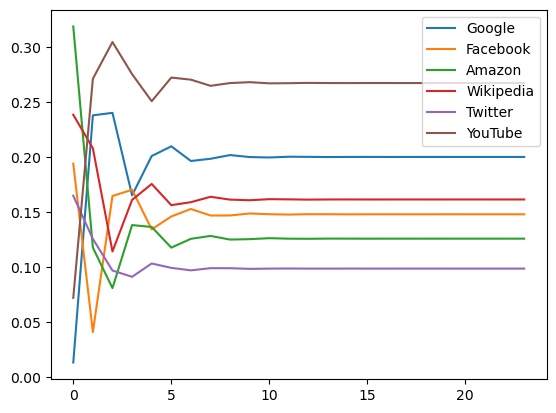

In [ ]:
# initial vector
x0 = np.random.rand(n)
x0=x0/la.norm(x0,1)
# call your function
allx3, ranking3 = solve_page_rank_Google_matrix(B,name_mapping,x0,0.85)
# print your results
print(allx3[:,-1])
plt.plot(allx3.T)
plt.legend(list(name_mapping.values()))
print(ranking3)

### Overall complexity of PageRank problem

In general, for the dense Google matrix with shape $(n,n)$, the cost of each matrix-vector multiplication during the power iteration method would be $O(n^2)$. 

$$ {\bf x}_{i+1} = {\bf G \, x}_{i} $$


In a PageRank problem, $n$ is very large! But let's look at each part of the Google matrix:

 $$ {\bf G} = \alpha \, {\bf M} + (1-\alpha) \,\frac{1}{n} \mathbf{1} $$
 
The Markov Matrix for the PageRank problem will likely be very sparse, since webpages will only have a few number of outgoing links. Hence, the calculation 

$$ {\bf x}_{i+1} = {\bf M \, x}_{i} $$

will take advantage of sparse operations, which can be in general approximated with $O(n)$ complexity.

We need to look at the complexity of performing

$$ {\bf x}_{i+1} = \mathbf{1} \, {\bf x}_{i} $$

Since $\mathbf{1}$ is a dense matrix, some would quickly jump to the conclusion that the complexity is $O(n^2)$. But it is not! Can you think of how this operation can be done efficiently? Discuss this with your team!




